In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\TazeenQ\\visualization\\02_activities\\assignments\\assignment_4\\retail_sales_dataset.csv"
sales_data = pd.read_csv(file_path)

# Data Cleaning and Preprocessing

# Drop any completely empty columns and rows
sales_data_cleaned = sales_data.dropna(how='all', axis=1).dropna(how='all', axis=0)

# Convert column names to standardized format (strip whitespace, lowercase)
sales_data_cleaned.columns = sales_data_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'date' column to datetime and create 'yearmonth'
if 'date' in sales_data_cleaned.columns:
    sales_data_cleaned['date'] = pd.to_datetime(sales_data_cleaned['date'], errors='coerce')
    sales_data_cleaned['yearmonth'] = sales_data_cleaned['date'].dt.to_period('M')

# Ensure numeric columns are properly formatted
numeric_columns = ['quantity', 'price_per_unit', 'total_amount']
for col in numeric_columns:
    if col in sales_data_cleaned.columns:
        sales_data_cleaned[col] = pd.to_numeric(sales_data_cleaned[col], errors='coerce')

# Handle missing or invalid data (e.g., fill missing numeric values with 0)
sales_data_cleaned.fillna({'quantity': 0, 'price_per_unit': 0, 'total_amount': 0}, inplace=True)

# Preview cleaned data
sales_data_cleaned.info(), sales_data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   object        
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   object        
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
 9   yearmonth         1000 non-null   period[M]     
dtypes: datetime64[ns](1), int64(5), object(3), period[M](1)
memory usage: 78.2+ KB


(None,
    transaction_id       date customer_id  gender  age product_category  \
 0               1 2023-11-24     CUST001    Male   34           Beauty   
 1               2 2023-02-27     CUST002  Female   26         Clothing   
 2               3 2023-01-13     CUST003    Male   50      Electronics   
 3               4 2023-05-21     CUST004    Male   37         Clothing   
 4               5 2023-05-06     CUST005    Male   30           Beauty   
 
    quantity  price_per_unit  total_amount yearmonth  
 0         3              50           150   2023-11  
 1         2             500          1000   2023-02  
 2         1              30            30   2023-01  
 3         1             500           500   2023-05  
 4         2              50           100   2023-05  )

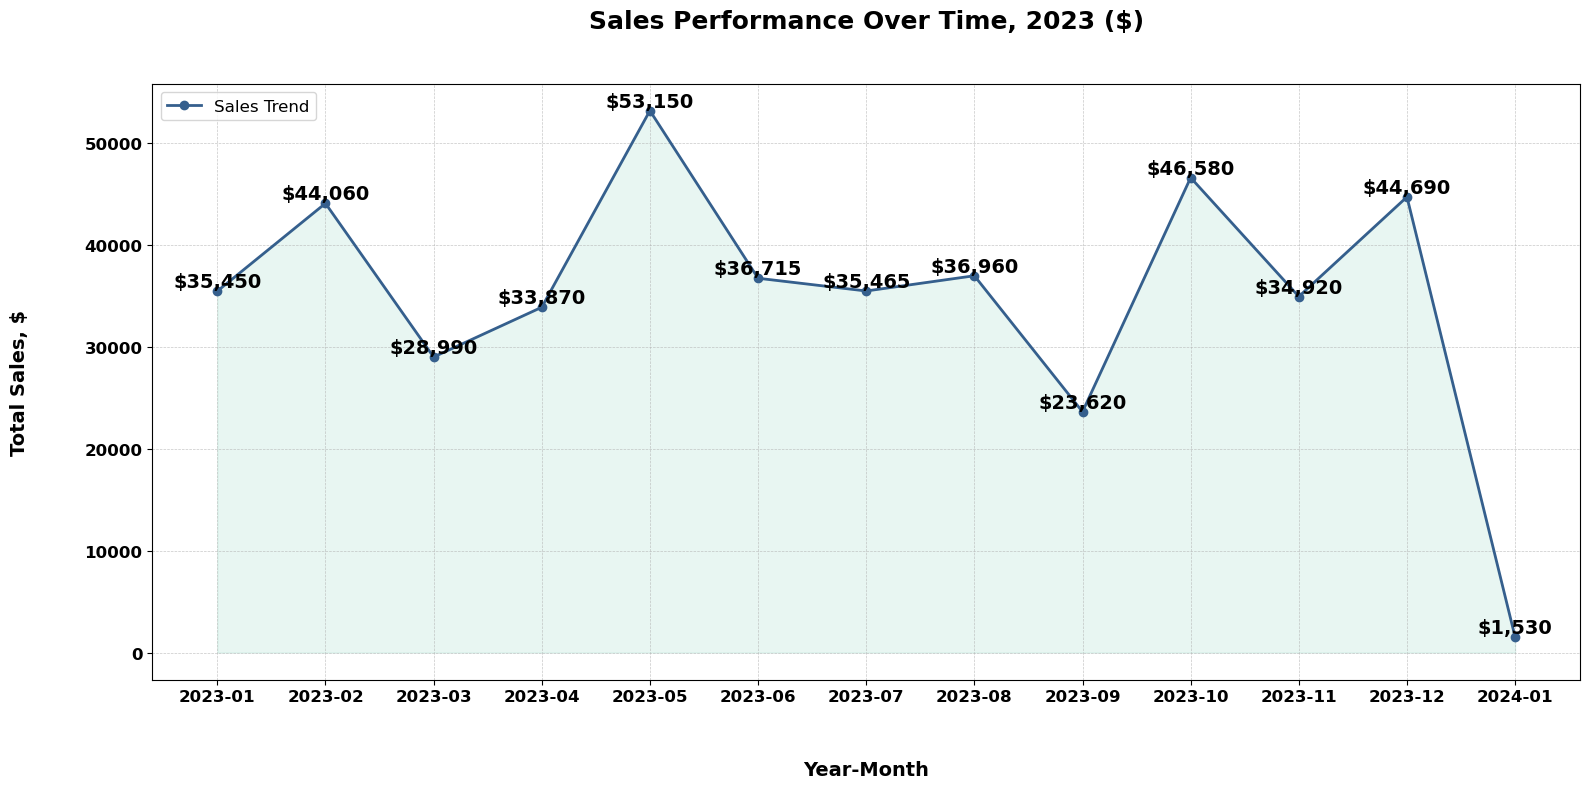

In [52]:
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# 1. Sales Performance Over Time using Viridis colormap
sales_over_time = sales_data_cleaned.groupby('yearmonth')['total_amount'].sum()

# Convert index to string for labeling
x_labels = sales_over_time.index.astype(str)

# Create the plot
plt.figure(figsize=(16, 8))
plt.plot(x_labels, sales_over_time, marker='o', color=viridis(0.3), label="Sales Trend", linewidth=2)
plt.fill_between(x_labels, sales_over_time, color=viridis(0.6), alpha=0.1)

# Add data labels
for i, value in enumerate(sales_over_time):
    plt.text(
        x=i,
        y=value,
        s=f"${value:,.0f}",
        ha='center',
        va='bottom',
        fontsize=14,
        color='black',
        fontweight='bold'
    )

# Title and labels with larger font for accessibility
plt.title("Sales Performance Over Time, 2023 ($)", fontsize=18, fontweight='bold', pad=40)
plt.xlabel("Year-Month", fontsize=14, fontweight='bold', labelpad=40)
plt.ylabel("Total Sales, $", fontsize=14, fontweight='bold', labelpad=40)


# Accessibility improvements: high contrast grid and tick labels
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, loc='upper left')

# Ensure tight layout for readability
plt.tight_layout()
plt.show()



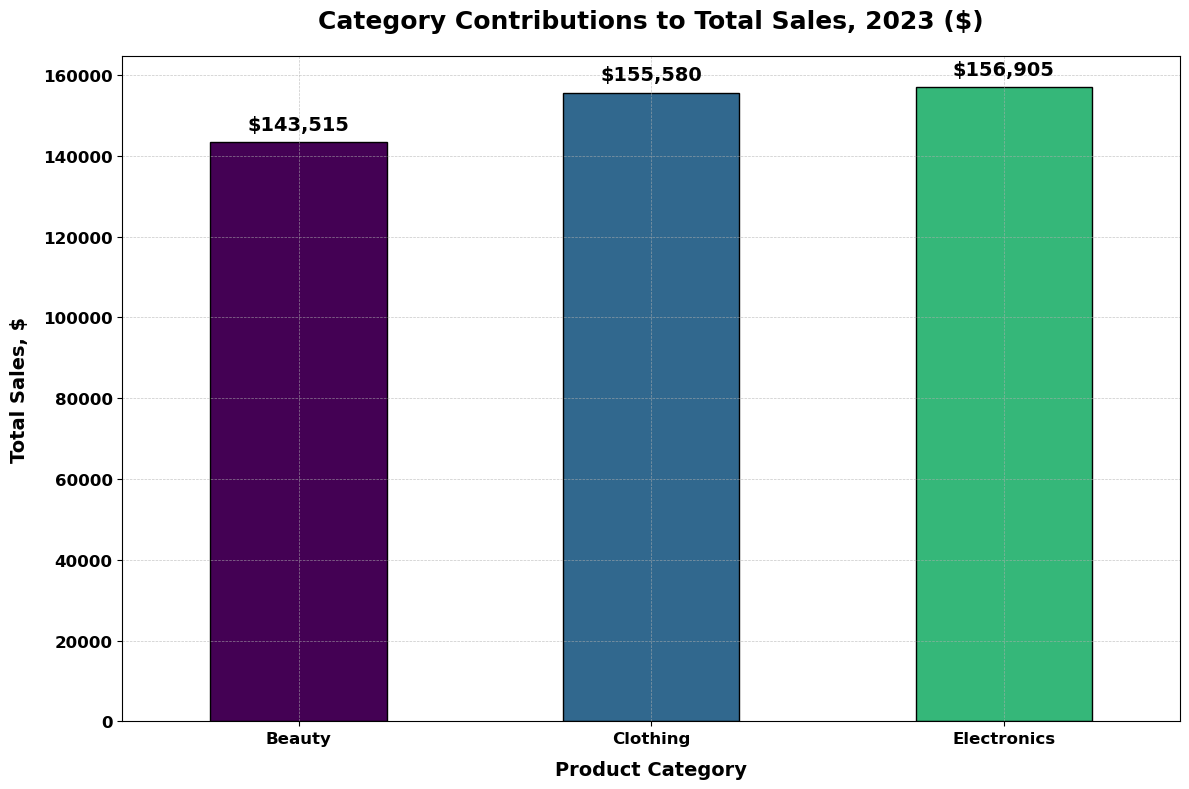

In [51]:

# 2. Category Contributions using Viridis colormap
category_contributions = sales_data_cleaned.groupby('product_category')['total_amount'].sum()

# Generate a range of colors from the viridis colormap
viridis_colors = [viridis(i / len(category_contributions)) for i in range(len(category_contributions))]

plt.figure(figsize=(12, 8))  # Increase the figure size for better readability
category_contributions.plot(
    kind='bar',
    color=viridis_colors,
    edgecolor='black'
)

# Add data labels
for i, value in enumerate(category_contributions):
    plt.text(
        x=i,
        y=value + (0.02 * value),  # Position slightly above each bar
        s=f"${value:,.0f}",       # Format with currency and commas
        ha='center',
        fontsize=14,
        fontweight='bold',
        color='black'
    )

# Add title, labels, and grid
plt.title("Category Contributions to Total Sales, 2023 ($)", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Product Category", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Total Sales, $", fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(fontsize=12, fontweight='bold', rotation=0)  # Keep category labels horizontal
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust the layout to center and middle-align the plot
plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.2)

# Show the plot
plt.tight_layout()
plt.show()
